In [1]:
import xarray as xr
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from netCDF4 import Dataset as netcdf
import netCDF4 as nc4

In [88]:
LR1= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/Austfon_l.csv', parse_dates=[1], index_col=3)
LR2= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/Vestfon_l.csv', parse_dates=[1], index_col=3)
LR3= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/North-Ea_l.csv', parse_dates=[1], index_col=3)
LR4= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/North-We_l.csv', parse_dates=[1], index_col=3)
LR5= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/South_l.csv', parse_dates=[1], index_col=3)
LR6= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/Barents_l.csv', parse_dates=[1], index_col=3)
MR1= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/Austfon_m.csv', parse_dates=[1], index_col=3)
MR2= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/Vestfon_m.csv', parse_dates=[1], index_col=3)
MR3= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/North-Ea_m.csv', parse_dates=[1], index_col=3)
MR4= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/North-We_m.csv', parse_dates=[1], index_col=3)
MR5= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/South_m.csv', parse_dates=[1], index_col=3)
MR6= pd.read_csv('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/export_results/Barents_m.csv', parse_dates=[1], index_col=3)


Liv_Elev = xr.Dataset(data_vars = dict(MR1= (["t"],MR1.changes.values),MR2= (["t"],MR2.changes.values),MR3= (["t"],MR3.changes.values),MR4= (["t"],MR4.changes.values),MR5= (["t"],MR5.changes.values),MR6= (["t"],MR6.changes.values),LR1= (["t"],LR1.changes.values),LR2= (["t"],LR2.changes.values),LR3= (["t"],LR3.changes.values),LR4= (["t"],LR4.changes.values),LR5= (["t"],LR5.changes.values),LR6= (["t"],LR6.changes.values),MR1_error= (["t"],MR1.errors.values),MR2_error= (["t"],MR2.errors.values),MR3_error= (["t"],MR3.errors.values),MR4_error= (["t"],MR4.errors.values),MR5_error= (["t"],MR5.errors.values),MR6_error= (["t"],MR6.errors.values),LR1_error= (["t"],LR1.errors.values),LR2_error= (["t"],LR2.errors.values),LR3_error= (["t"],LR3.errors.values),LR4_error= (["t"],LR4.errors.values),LR5_error= (["t"],LR5.errors.values),LR6_error= (["t"],LR6.errors.values)),coords=dict(t=MR1.dates_datetime.values,t_decimal = MR1.dates_decimal.values))
Liv_Elev .to_netcdf("Liv_Elevation.nc")       



In [16]:
ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_MR1.nc')
#ds['time']= pd.date_range('2010-01-01','2020-12-31')
ds

<xarray.Dataset>
Dimensions:   (time: 4018)
Coordinates:
  * time      (time) float64 1.218e+03 1.22e+03 1.22e+03 ... 1.582e+03 1.582e+03
Data variables:
    smb_mean  (time) float64 ...
    rf_mean   (time) float64 ...
    sf_mean   (time) float64 ...
    ru_mean   (time) float64 ...
    su_mean   (time) float64 ...
    sc_mean   (time) float64 ...
    sm_mean   (time) float64 ...
    tsh_mean  (time) float64 ...
    me_mean   (time) float64 ...

In [17]:
def ELE_MAR(typ,ntype,title,npng,MAR):
    #watch for units and conversion
    fig, axes = plt.subplots(3,2,figsize=(18,14), sharex=True, sharey=True)
    
    for i in range(3):
        for j in range(2):

            ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'.nc')
            ds['time']= pd.date_range('2010-01-01','2020-12-31')
            var= ds[str(MAR)]
            if (var.units=='m'):
                x=1
            else:
                x=0.00085

            matdata=io.loadmat('/geos/d14/CS2/dhdt/Timeseries/Svalbard_uncorr_MF/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'_MF/tmsr_rgi60_Svalbard_'+str(ntype)+'_R'+str((1*(i+1))+i+j)+'.mat')
            elevation = matdata['Tmsr'][0]/x
            t = matdata['time'][0]
            timepy= pd.to_datetime(t-719529, unit='D')
            E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation+(0-elevation[0]))),coords=dict(t=timepy))

            labels = ['MAR '+str(MAR),'CryoSat-2 ']#,'Livia'
            plt.rcParams['font.size'] = '12'
            color = 'tab:red'
            color2 = 'tab:cyan'
            color3 = 'tab:green'
            
           # Liv_Elev = xr.open_dataset("Liv_Elevation.nc")
            #if (typ == str('MR')):
            #    d_l=[Liv_Elev.MR1/x,Liv_Elev.MR2/x,Liv_Elev.MR3/x,Liv_Elev.MR4/x,Liv_Elev.MR5/x,Liv_Elev.MR6/x]
            #else:    
             #   d_l=[Liv_Elev.LR1/x,Liv_Elev.LR2/x,Liv_Elev.LR3/x,Liv_Elev.LR4/x,Liv_Elev.LR5/x,Liv_Elev.LR6/x]
    
            axes[i,j].plot(var.time.sel(time=slice('2010-07-16','2019-12-31')), (var.sel(time=slice('2010-07-16','2019-12-31'))).cumsum(), color=color2)
                
            axes[i,j].legend(labels)
            axes[i, j].set_title('Region '+str((1*(i+1))+i+j))
            axes[i,j].plot(E_ds.t, E_ds.elev, color=color)
           # axes[i,j].plot(pd.to_datetime(Liv_Elev.t), (d_l[(1*(i+1))+i+j-1]+(0-d_l[(1*(i+1))+i+j-1][0])), color=color3)
            axes[i,j].axhline(y=0,linestyle='dashed',color='gray')
            axes[i,j].legend(labels)
            
    for ax in axes.flat:
        ax.set(xlabel='Time', ylabel=str(var.units))
    for ax in axes.flat:
        ax.label_outer()
    fig.suptitle('Svalbard '+str(title)+' Terminating: '+str(var.long_name)+' Comparison')
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(npng,dpi=110)
    plt.show()

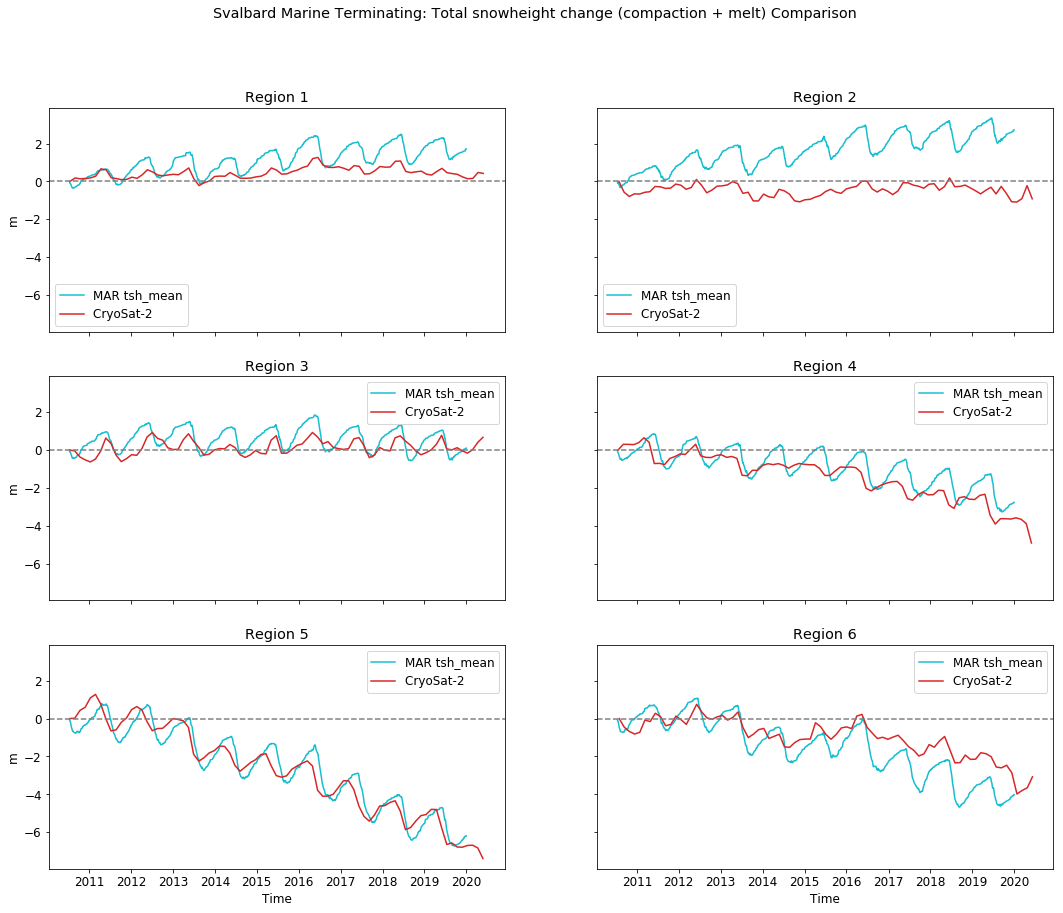

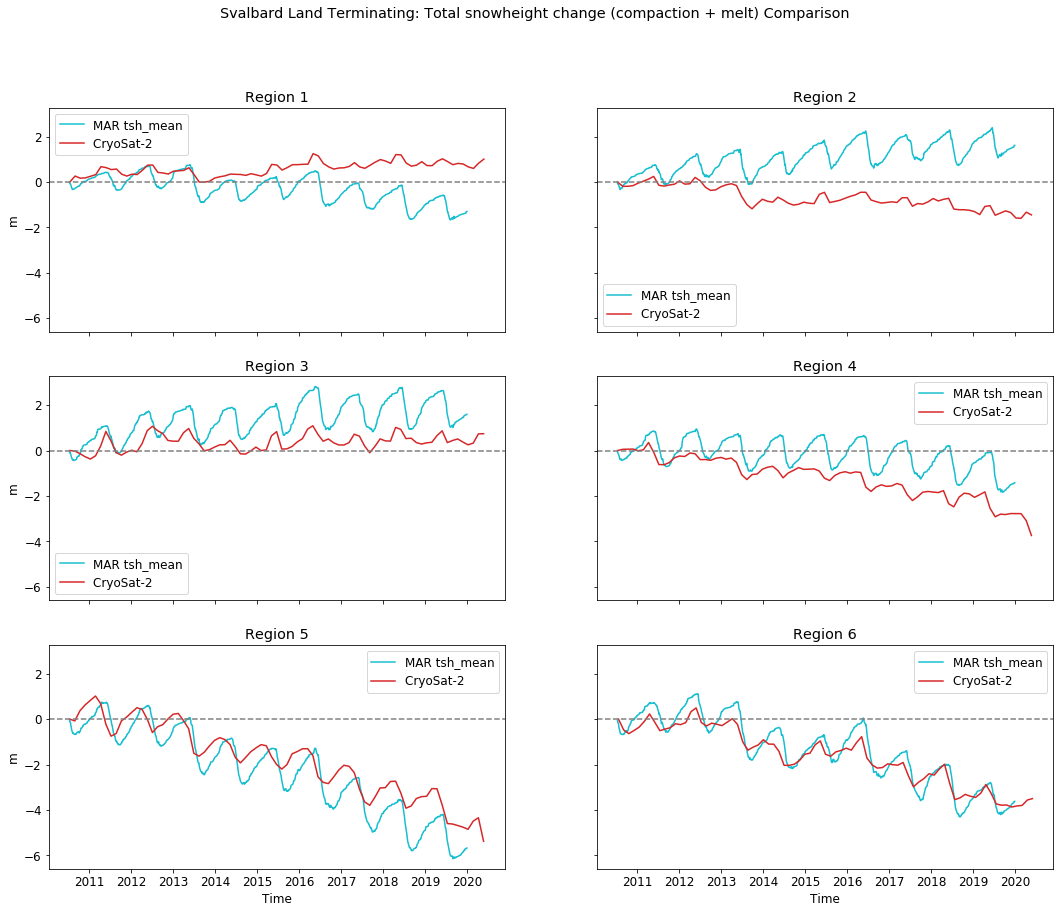

In [19]:
ELE_MAR('MR','marine','Marine','Svalbard_MELEZN6_X.png','tsh_mean')
ELE_MAR('LR','land','Land','Svalbard_LELEZN6_X.png','tsh_mean')

In [286]:
def ELE_MAR(typ,ntype,title,npng,MAR):
    #watch for units and conversion
    fig, axes = plt.subplots(3,2,figsize=(18,14), sharex=True, sharey=True)
    
    for i in range(3):
        for j in range(2):

            ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'.nc')
            ds['time']= pd.date_range('2010-01-01','2020-12-31')
            var= ds[str(MAR)]
            if (var.units=='m'):
                x=1
            else:
                x=0.00085

            matdata=io.loadmat('/geos/d14/CS2/dhdt/Timeseries/Svalbard_uncorr_MF/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'_MF/tmsr_rgi60_Svalbard_'+str(ntype)+'_R'+str((1*(i+1))+i+j)+'.mat')
            elevation = matdata['Tmsr'][0]/x
            t = matdata['time'][0]
            timepy= pd.to_datetime(t-719529, unit='D')
            E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation+(0-elevation[0]))),coords=dict(t=timepy))
            
            mar= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'.nc')
            mar['time']= pd.date_range('2010-01-01','2020-12-31')
            mar['sc_mean']=('time',mar.sc_mean/x)
            corrected=(E_ds-mar.sc_mean.interp(time= E_ds.t))+(0-(E_ds-mar.sc_mean.interp(time= E_ds.t)).elev[0])
            
            labels = ['MAR '+str(MAR),'compactionCorrected recur','Recur ','Livia']
            plt.rcParams['font.size'] = '12'
            color = 'tab:red'
            color2 = 'tab:cyan'
            color3 = 'tab:green'
            color4 = 'tab:orange'
            
            Liv_Elev = xr.open_dataset("Liv_Elevation.nc")
            if (typ == str('MR')):
                d_l=[Liv_Elev.MR1/x,Liv_Elev.MR2/x,Liv_Elev.MR3/x,Liv_Elev.MR4/x,Liv_Elev.MR5/x,Liv_Elev.MR6/x]
            else:    
                d_l=[Liv_Elev.LR1/x,Liv_Elev.LR2/x,Liv_Elev.LR3/x,Liv_Elev.LR4/x,Liv_Elev.LR5/x,Liv_Elev.LR6/x]
    
            axes[i,j].plot(var.time.sel(time=slice('2010-07-16','2019-12-31')), (var.sel(time=slice('2010-07-16','2019-12-31'))).cumsum(), color=color2)
                
            axes[i,j].legend(labels)
            axes[i, j].set_title('Region '+str((1*(i+1))+i+j))
            axes[i,j].plot(E_ds.t, corrected.elev, color=color4)
            axes[i,j].plot(E_ds.t, E_ds.elev, color=color)
            axes[i,j].plot(pd.to_datetime(Liv_Elev.t), (d_l[(1*(i+1))+i+j-1]+(0-d_l[(1*(i+1))+i+j-1][0])), color=color3)
            axes[i,j].axhline(y=0,linestyle='dashed',color='gray')
            axes[i,j].legend(labels)
            
    for ax in axes.flat:
        ax.set(xlabel='Time', ylabel=str(var.units))
    for ax in axes.flat:
        ax.label_outer()
    fig.suptitle('Svalbard '+str(title)+' Terminating: '+str(var.long_name)+' Comparison')
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()            

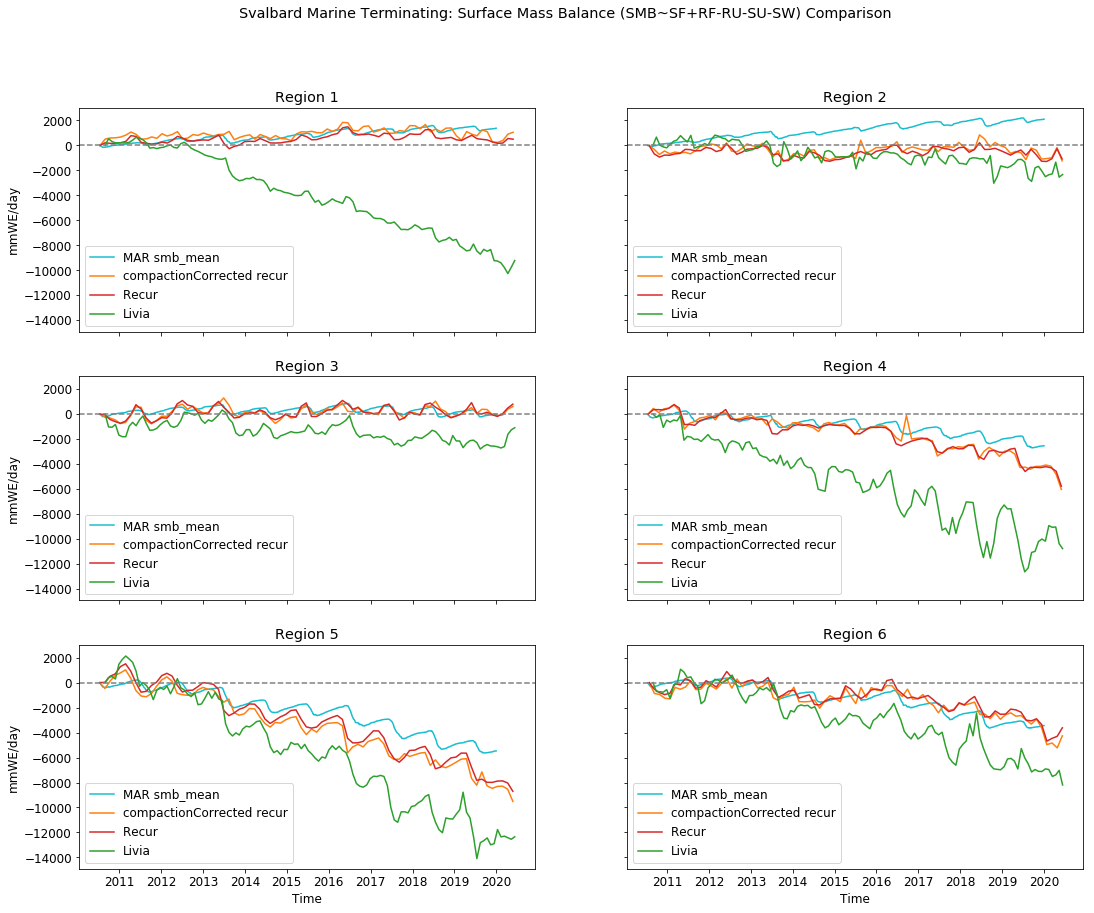

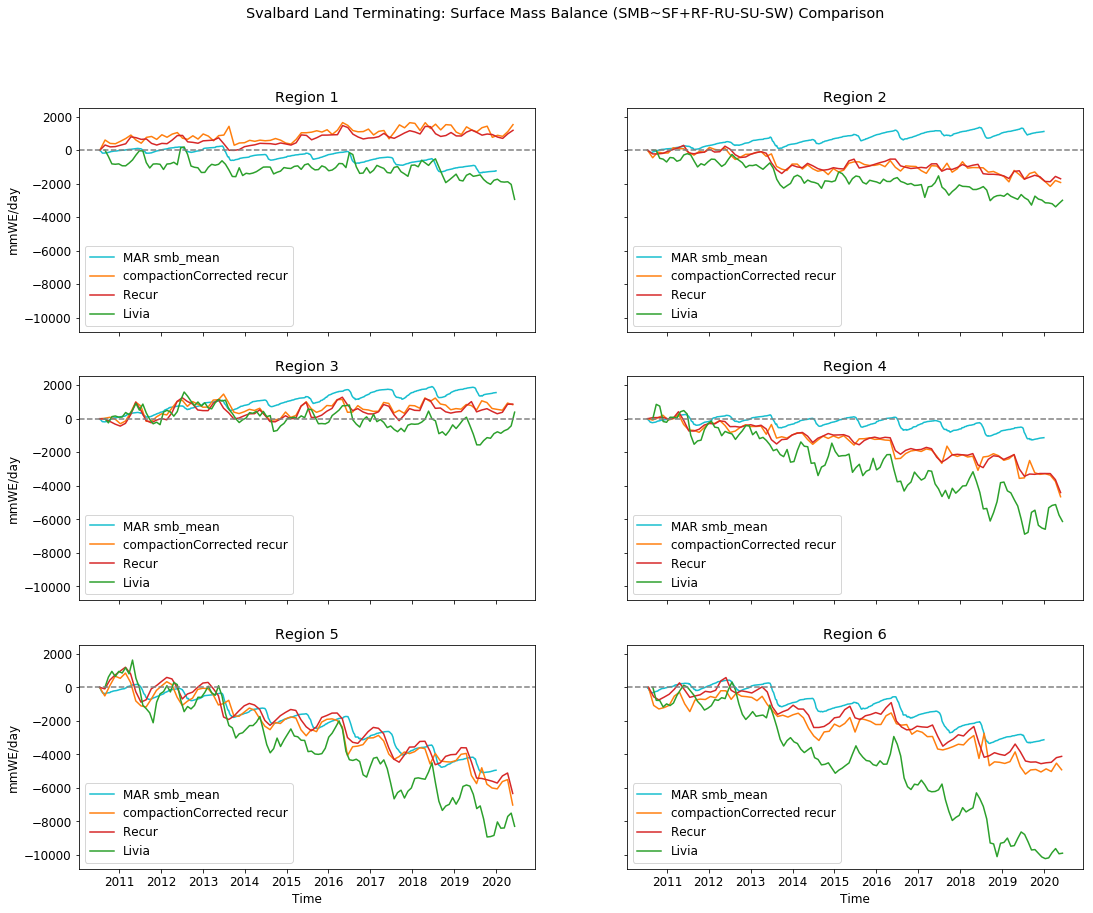

In [287]:
ELE_MAR('MR','marine','Marine','Svalbard_MELESMB_compaction.png','smb_mean')
ELE_MAR('LR','land','Land','Svalbard_LELESMB_compaction.png','smb_mean')

In [203]:
def recur_grid(typ,ntype,title,npng,grid_type):
    """typ = MR/LR, ntype = land/marine, grid_type = L/M"""
    fig, axes = plt.subplots(3,2,figsize=(18,14), sharex=True, sharey=True)
    
    for i in range(3):
        for j in range(2):
            grid_data=xr.open_dataset('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/Elevation/Grid_elevation_'+str(grid_type)+'.nc') 
            grid_data["time"]= pd.to_datetime(grid_data.time-719529,unit='D')
            
            d_g=[ grid_data.LR1, grid_data.LR2, grid_data.LR3, grid_data.LR4, grid_data.LR5, grid_data.LR6]
            
            matdata=io.loadmat('/geos/d14/CS2/dhdt/Timeseries/Svalbard_uncorr_MF/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'_MF/tmsr_rgi60_Svalbard_'+str(ntype)+'_R'+str((1*(i+1))+i+j)+'.mat')
            elevation = matdata['Tmsr'][0]
            t = matdata['time'][0]
            timepy= pd.to_datetime(t-719529, unit='D')
            E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation+(0-elevation[0]))),coords=dict(t=timepy))
            
            Liv_Elev = xr.open_dataset("Liv_Elevation.nc")
            if (grid_type == str('L')):
                d_l=[Liv_Elev.LR1,Liv_Elev.LR2,Liv_Elev.LR3,Liv_Elev.LR4,Liv_Elev.LR5,Liv_Elev.LR6]
            else:
                d_l=[Liv_Elev.MR1,Liv_Elev.MR2,Liv_Elev.MR3,Liv_Elev.MR4,Liv_Elev.MR5,Liv_Elev.MR6]
            
            labels = ['Grid','Recur','Livia']
            plt.rcParams['font.size'] = '12'
            color = 'tab:red'
            color2 = 'tab:cyan'
            color3 = 'tab:green'
            
            axes[i,j].plot(grid_data.time, (d_g[(1*(i+1))+i+j-1]+(0-d_g[(1*(i+1))+i+j-1][0])), color=color)
            axes[i,j].legend(labels)
            axes[i, j].set_title('Region '+str((1*(i+1))+i+j))
            axes[i,j].plot(E_ds.t, E_ds.elev, color=color2)
            axes[i,j].plot(pd.to_datetime(Liv_Elev.t), (d_l[(1*(i+1))+i+j-1]+(0-d_l[(1*(i+1))+i+j-1][0])), color=color3)
            axes[i,j].axhline(y=0,linestyle='dashed',color='gray')
            axes[i,j].legend(labels)
            
    for ax in axes.flat:
        ax.set(xlabel='Time', ylabel=str(grid_data.LR1.units))
    for ax in axes.flat:
        ax.label_outer()
    fig.suptitle('Svalbard '+str(title)+' Terminating: Method Comparison')
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()

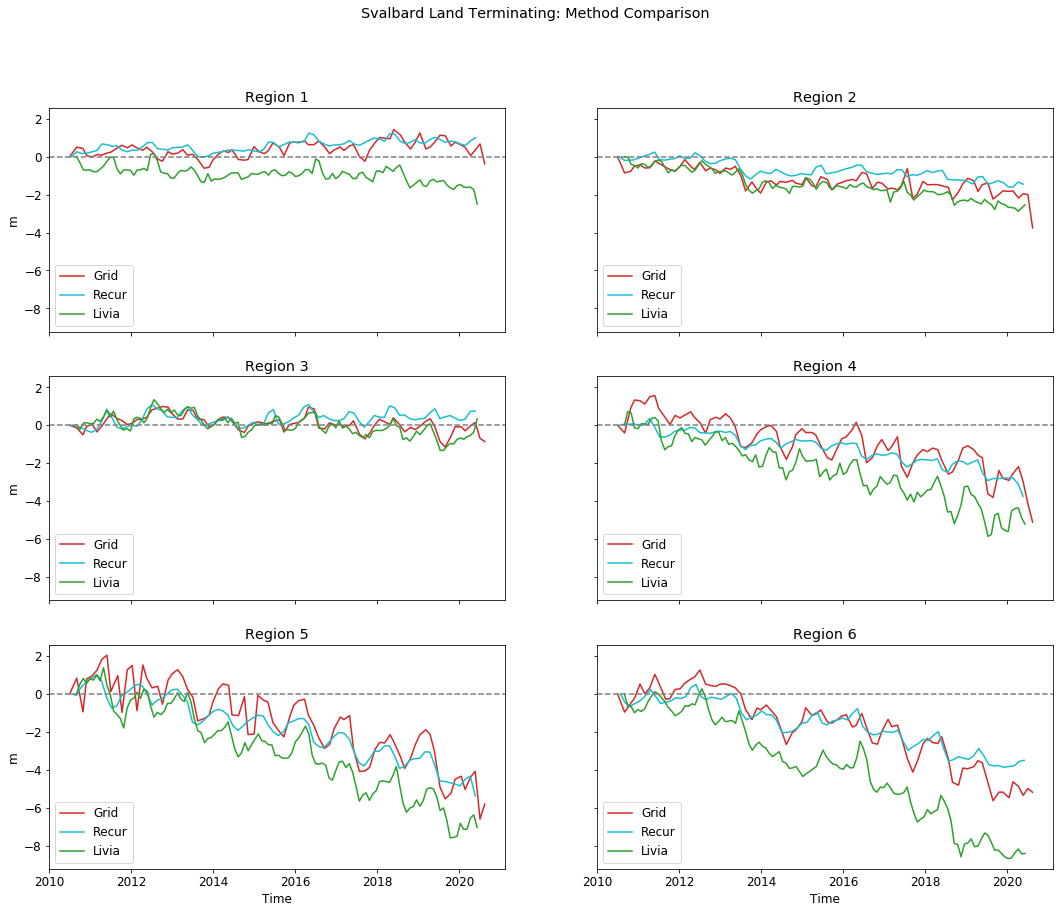

In [204]:
recur_grid('LR','land','Land','Svalbard_Land_method_uncorr.png','L')

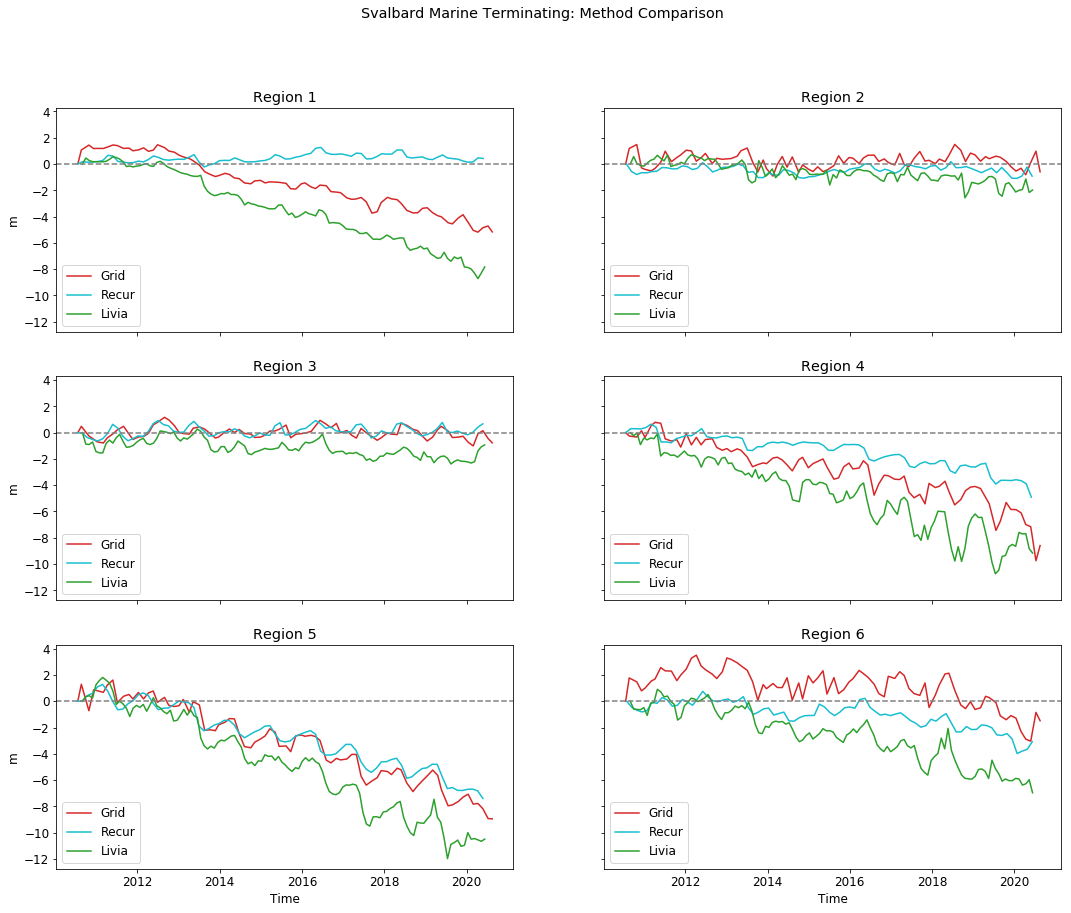

In [205]:
recur_grid('MR','marine','Marine','Svalbard_Marine_method_uncorr.png','M')

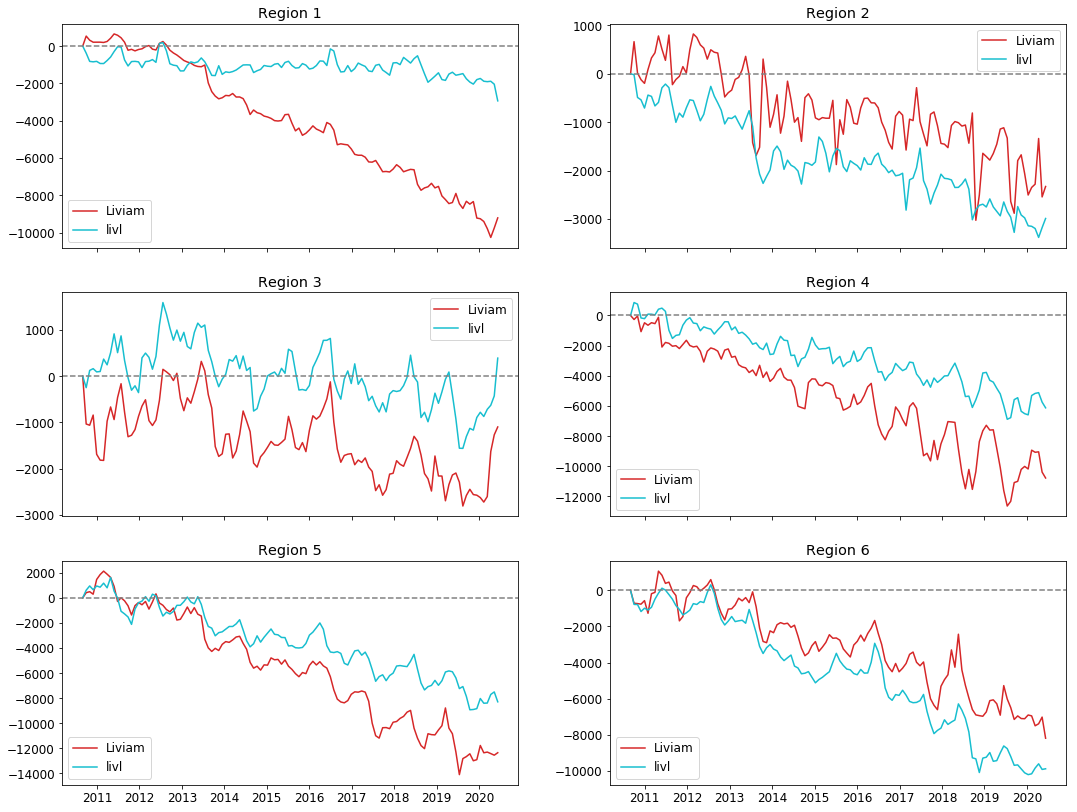

In [94]:
def elev_comp(ncfile)
fig, axes = plt.subplots(3,2,figsize=(18,14), sharex=True)
    
for i in range(3):
    for j in range(2):



        labels = ['Liviam','livl']
        plt.rcParams['font.size'] = '12'
        color = 'tab:red'
        color2 = 'tab:cyan'
            
        Liv_Elev = xr.open_dataset("Liv_Elevation.nc")
        d_m=[Liv_Elev.MR1/0.00085,Liv_Elev.MR2/0.00085,Liv_Elev.MR3/0.00085,Liv_Elev.MR4/0.00085,Liv_Elev.MR5/0.00085,Liv_Elev.MR6/0.00085]
            
        d_l=[Liv_Elev.LR1/0.00085,Liv_Elev.LR2/0.00085,Liv_Elev.LR3/0.00085,Liv_Elev.LR4/0.00085,Liv_Elev.LR5/0.00085,Liv_Elev.LR6/0.00085]
            
        axes[i,j].legend(labels)
        axes[i, j].set_title('Region '+str((1*(i+1))+i+j))
        axes[i,j].plot(pd.to_datetime(Liv_Elev.t), (d_m[(1*(i+1))+i+j-1]+(0-d_m[(1*(i+1))+i+j-1][0])), color=color)
        axes[i,j].plot(pd.to_datetime(Liv_Elev.t), (d_l[(1*(i+1))+i+j-1]+(0-d_l[(1*(i+1))+i+j-1][0])), color=color2)
        
        axes[i,j].axhline(y=0,linestyle='dashed',color='gray')
        axes[i,j].legend(labels)
            
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [216]:
def MAR_comp(MAR_mean):
    fig, axes = plt.subplots(3,2,figsize=(18,14), sharex=True,sharey=True)
    
    for i in range(3):
        for j in range(2):



            labels = ['Land_MAR','Marine_MAR']
            plt.rcParams['font.size'] = '12'
            color = 'tab:red'
            color2 = 'tab:cyan'
            
            ds_l= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_LR'+str((1*(i+1))+i+j)+'.nc')
            ds_l['time']= pd.date_range('2010-01-01','2020-12-31')
            var_l= ds_l[str(MAR_mean)] 
            ds_m= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_MR'+str((1*(i+1))+i+j)+'.nc')
            ds_m['time']= pd.date_range('2010-01-01','2020-12-31')
            var_m= ds_m[str(MAR_mean)] 
        
            axes[i,j].legend(labels)
            axes[i, j].set_title('Region '+str((1*(i+1))+i+j))
            axes[i,j].plot(var_l.time.sel(time=slice('2010-07-16','2019-12-31')), var_l.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color)
            axes[i,j].plot(var_m.time.sel(time=slice('2010-07-16','2019-12-31')), var_m.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color2)
            axes[i,j].axhline(y=0,linestyle='dashed',color='gray')
            axes[i,j].legend(labels)
            
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.suptitle('Svalbard: '+str(var_m.long_name)+' Comparison')
    plt.savefig('SMB_Comparison.png')
    plt.show()

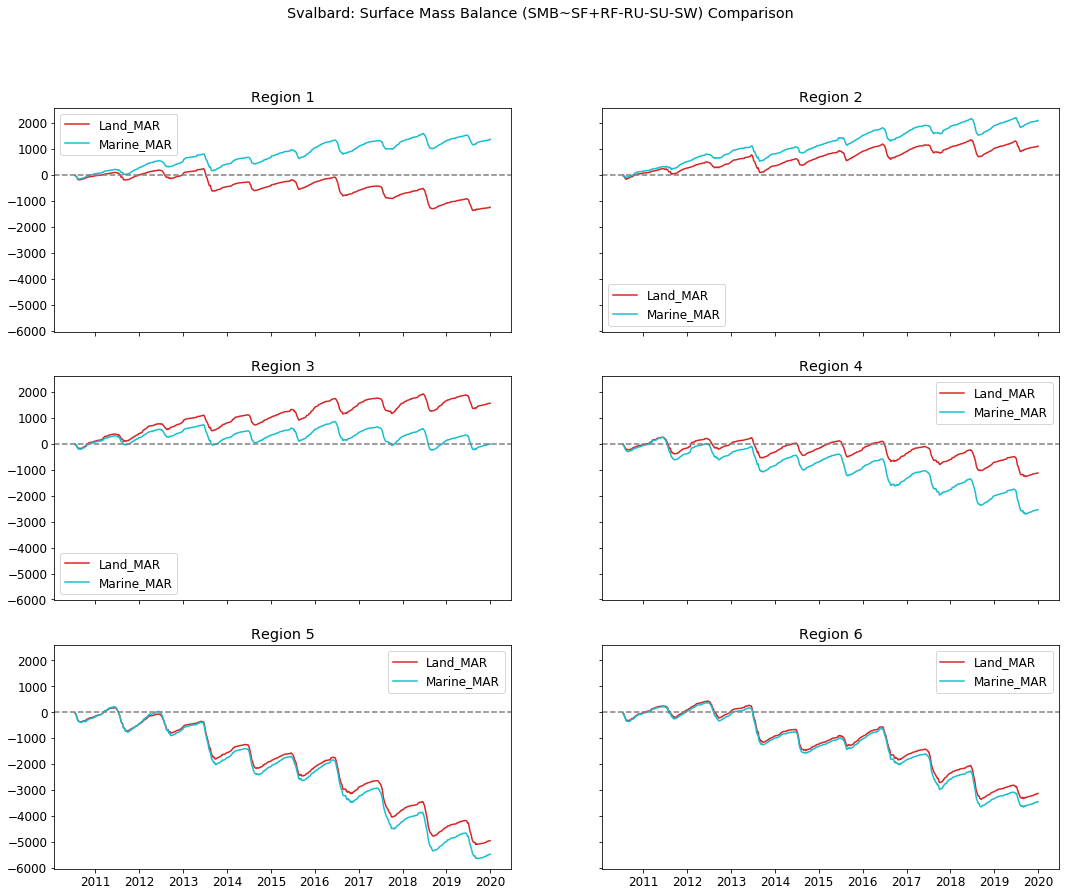

In [217]:
MAR_comp('smb_mean')

In [251]:
def recur_grid(typ,ntype,title,npng,grid_type):
    """typ = MR/LR, ntype = land/marine, grid_type = L/M"""
    fig, axes = plt.subplots(3,2,figsize=(18,14), sharex=True, sharey=True)
    
    for i in range(3):
        for j in range(2):
            grid_data=xr.open_dataset('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/Elevation/Grid_elevation_'+str(grid_type)+'.nc') 
            grid_data["time"]= pd.to_datetime(grid_data.time-719529,unit='D')
            
            d_g=[ grid_data.LR1, grid_data.LR2, grid_data.LR3, grid_data.LR4, grid_data.LR5, grid_data.LR6]
            
            matdata=io.loadmat('/geos/d14/CS2/dhdt/Timeseries/Svalbard_uncorr_MF/Svalbard_'+str(typ)+str((1*(i+1))+i+j)+'_MF/tmsr_rgi60_Svalbard_'+str(ntype)+'_R'+str((1*(i+1))+i+j)+'.mat')
            elevation = matdata['Tmsr'][0]
            t = matdata['time'][0]
            timepy= pd.to_datetime(t-719529, unit='D')
            E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation+(0-elevation[0]))),coords=dict(t=timepy))
            
            mar= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_'+str(grid_type)+'R'+str((1*(i+1))+i+j)+'.nc')
            mar['time']= pd.date_range('2010-01-01','2020-12-31')
            corrected=(E_ds-mar.sc_mean.interp(time= E_ds.t))+(0-(E_ds-mar.sc_mean.interp(time= E_ds.t)).elev[0])
            
            
            Liv_Elev = xr.open_dataset("Liv_Elevation.nc")
            if (grid_type == str('L')):
                d_l=[Liv_Elev.LR1,Liv_Elev.LR2,Liv_Elev.LR3,Liv_Elev.LR4,Liv_Elev.LR5,Liv_Elev.LR6]
            else:
                d_l=[Liv_Elev.MR1,Liv_Elev.MR2,Liv_Elev.MR3,Liv_Elev.MR4,Liv_Elev.MR5,Liv_Elev.MR6]
            
            labels = ['Grid','compactionCorrected','Recur','Livia']
            plt.rcParams['font.size'] = '12'
            color = 'tab:red'
            color2 = 'tab:cyan'
            color3 = 'tab:green'
            color4 = 'tab:orange'
            
            axes[i,j].plot(grid_data.time, (d_g[(1*(i+1))+i+j-1]+(0-d_g[(1*(i+1))+i+j-1][0])), color=color)
            axes[i,j].legend(labels)
            axes[i,j].set_title('Region '+str((1*(i+1))+i+j))
            axes[i,j].plot(E_ds.t, corrected.elev, color=color4)
            axes[i,j].plot(E_ds.t, E_ds.elev, color=color2)
            axes[i,j].plot(pd.to_datetime(Liv_Elev.t), (d_l[(1*(i+1))+i+j-1]+(0-d_l[(1*(i+1))+i+j-1][0])), color=color3)
            axes[i,j].axhline(y=0,linestyle='dashed',color='gray')
            axes[i,j].legend(labels)
            
    for ax in axes.flat:
        ax.set(xlabel='Time', ylabel=str(grid_data.LR1.units))
    for ax in axes.flat:
        ax.label_outer()
    fig.suptitle('Svalbard '+str(title)+' Terminating: Method Comparison')
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()

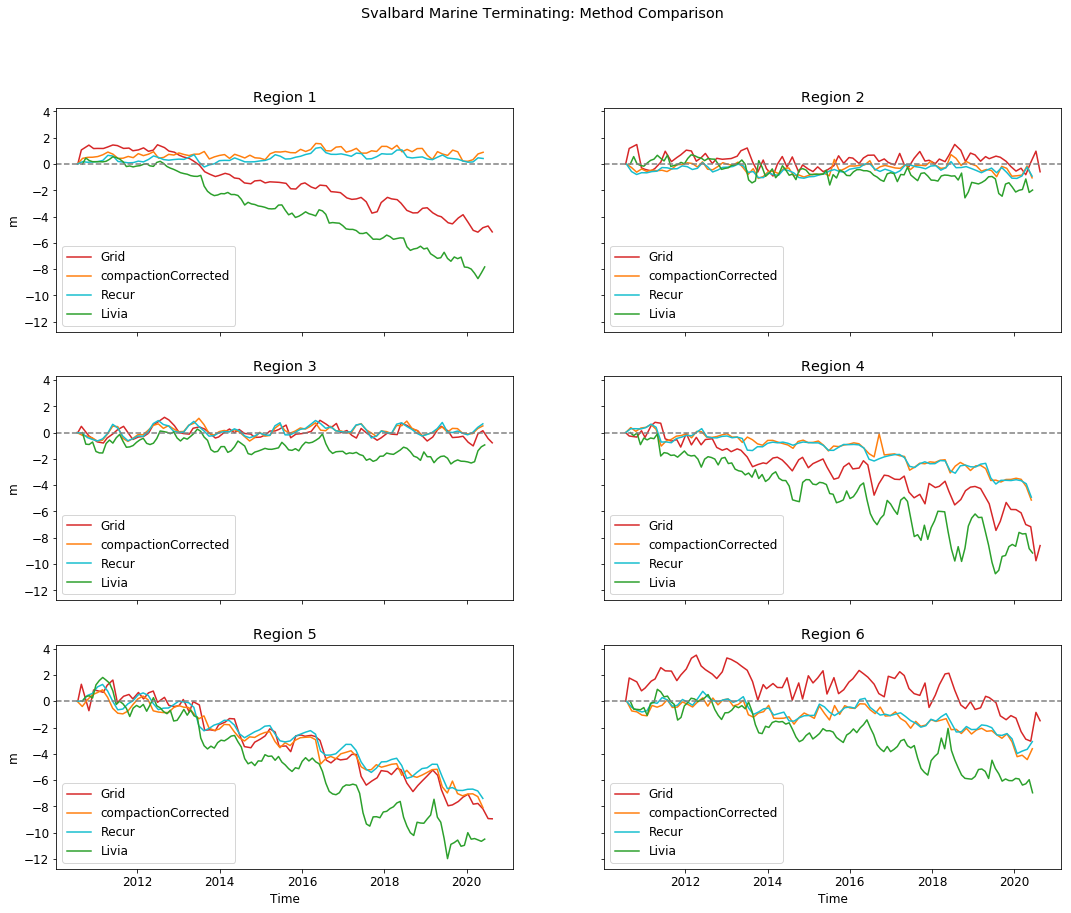

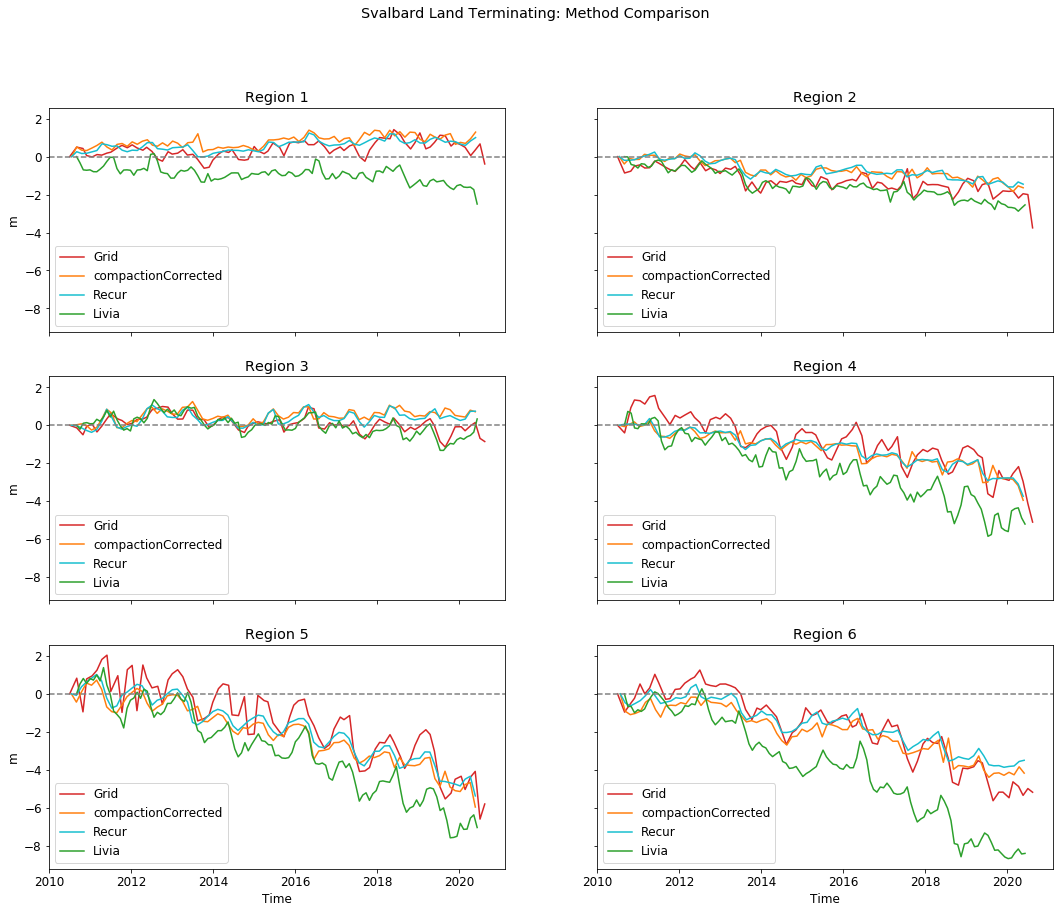

In [252]:
recur_grid('MR','marine','Marine','Svalbard_Marine_method_uncorr_compaction.png','M')
recur_grid('LR','land','Land','Svalbard_Land_method_uncorr_compaction.png','L')

In [241]:
mar.sc_mean

<xarray.DataArray 'sc_mean' (time: 4018)>
array([-0.151953,  0.279114,  0.247167, ..., -0.019892, -0.164854, -0.149377])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
Attributes:
    units:      m
    long_name:  Snowheight change (compaction)